**The task at hand is to develop a practical solution for image tagging by training a straightforward model. This model should
exhibit proficiency in categorizing images into elementary classeslike "cat", "dog,"car",etc., employing prominent libraries such as
TensorFlow or PyTorch. The overarching objective is to harness thepower of machine learning to create an effective and accessible
image classification system with real-world applicability acrossvarious domains and use cases.**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0



In [2]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(train_images)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Add Dropout layer
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [4]:
# Compile the model with a different optimizer and learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Train the model
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=50,  # Increase the number of epochs
                    validation_data=(test_images, test_labels))


Epoch 1/50


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 100ms/step - accuracy: 0.1964 - loss: 2.4650 - val_accuracy: 0.3823 - val_loss: 1.7227
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 115s 147ms/step - accuracy: 0.3033 - loss: 1.9505 - val_accuracy: 0.4383 - val_loss: 1.5730
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 119s 151ms/step - accuracy: 0.3488 - loss: 1.7909 - val_accuracy: 0.4563 - val_loss: 1.5387
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 126s 160ms/step - accuracy: 0.3894 - loss: 1.6796 - val_accuracy: 0.4771 - val_loss: 1.4923
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 187s 234ms/step - accuracy: 0.4176 - loss: 1.6117 - val_accuracy: 0.5208 - val_loss: 1.3343
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 187s 228ms/step - accuracy: 0.4375 - loss: 1.5528 - val_accuracy: 0.5121 - val_loss: 1.3965
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 161s 205ms/step - accuracy: 0.4573 - loss: 1.5036 - val_accuracy: 0.5644 - val_loss: 1.2257
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 180ms/step - accuracy: 0.4807 - loss: 1.446

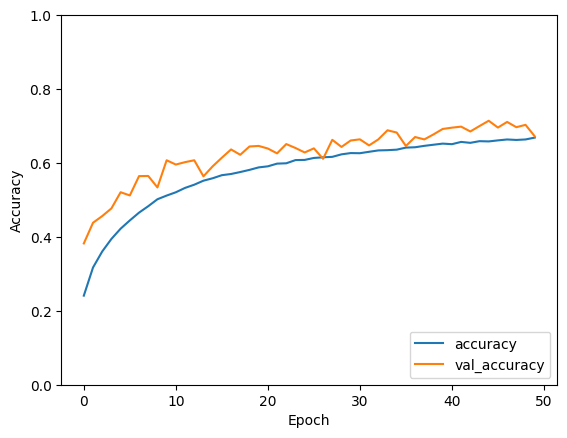

313/313 - 5s - 17ms/step - accuracy: 0.6722 - loss: 0.9383
Test accuracy: 0.6722


In [5]:
# Plot accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')
